In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
#dropping unnecessary columns
col = ['url', 'address', 'phone']
df.drop(col, inplace=True, axis=1)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
#renaming columns
df = df.rename(columns={'approx_cost(for two people)':'approx_cost', 'listed_in(type)':'type', 'listed_in(city)':'neighbourhood'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost', 'reviews_list',
       'menu_item', 'type', 'neighbourhood'],
      dtype='object')

In [6]:
#dropping duplicate records
duplicate_records = df[df.duplicated()]
len(duplicate_records)
df.drop_duplicates(inplace=True)

In [9]:
#cleaning rates by removing '/5'
def clean_rate(rate):
    if rate == '-' or rate == 'NEW':
        return np.nan
    l = str(rate).split('/')
    return float(l[0])
df['rate'] = df['rate'].apply(clean_rate)
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51654, dtype: float64

In [10]:
#cleaning approx costs
df['approx_cost'] = df['approx_cost'].str.replace(',', '').astype(float)
df['approx_cost']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost, Length: 51654, dtype: float64

Text(0, 0.5, 'Name of Restaurants')

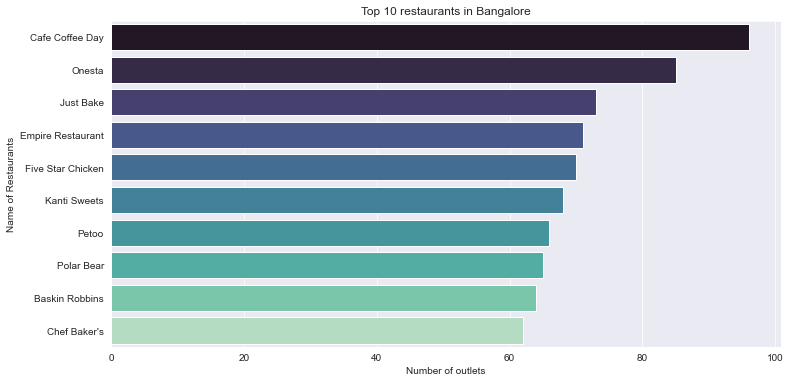

In [7]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
ch = df['name'].value_counts()[:10]

sns.barplot(x= ch,y = ch.index, palette = 'mako')
plt.title('Top 10 restaurants in Bangalore')
plt.xlabel('Number of outlets')
plt.ylabel('Name of Restaurants')

<function matplotlib.pyplot.show(close=None, block=None)>

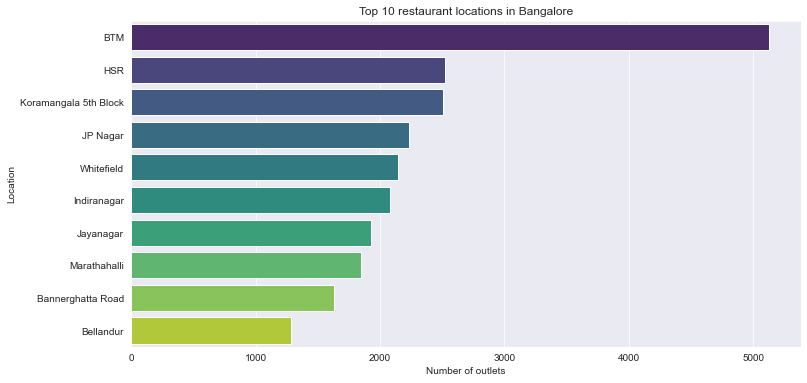

In [8]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
ch = df['location'].value_counts()[:10]

sns.barplot(x= ch,y = ch.index,palette = 'viridis')
plt.title('Top 10 restaurant locations in Bangalore')
plt.xlabel('Number of outlets')
plt.ylabel('Location')
plt.show

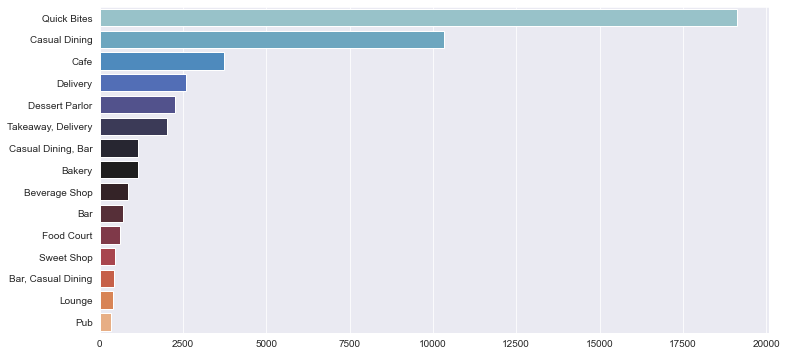

In [11]:
plt.figure(figsize = (12,6))

rt = df['rest_type'].value_counts()[:15]
sns.barplot(x= rt,y = rt.index,palette = 'icefire')
plt.xlabel('')
plt.show()

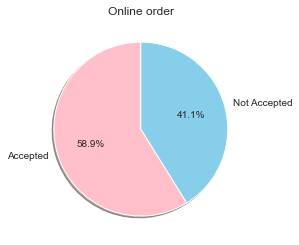

In [12]:
labels = ["Accepted",'Not Accepted']
values = df['online_order'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['pink', 'skyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.title('Online order')
plt.show()

C:\Users\rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

Text(0.5, 1.0, 'Location wise count for restaurants')

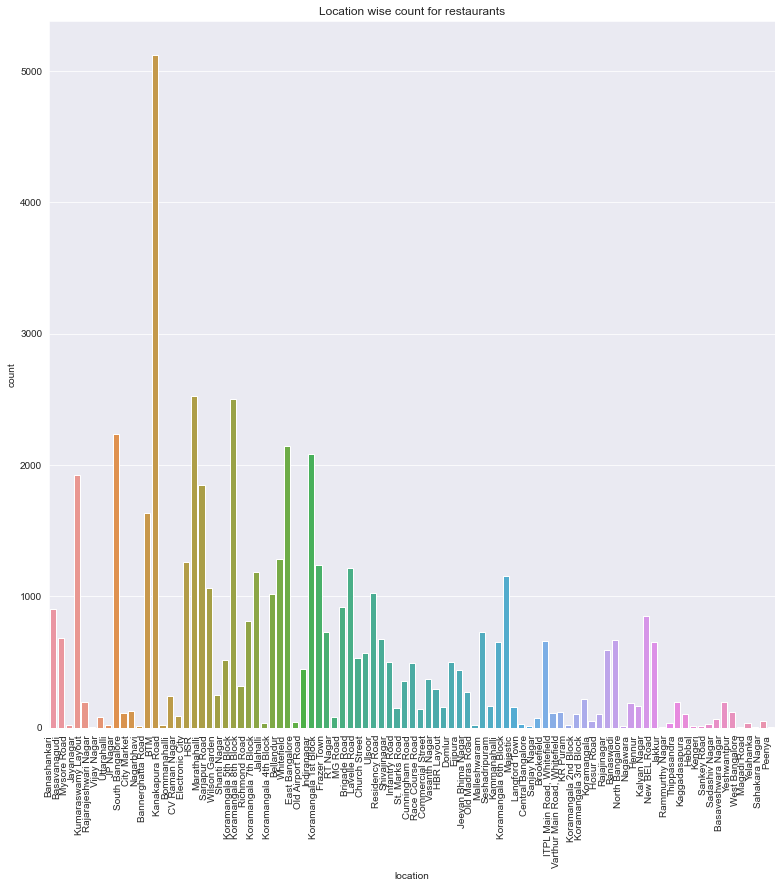

In [16]:
sns.countplot(df['location'])
sns.countplot(df['location']).set_xticklabels(sns.countplot(df['location']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

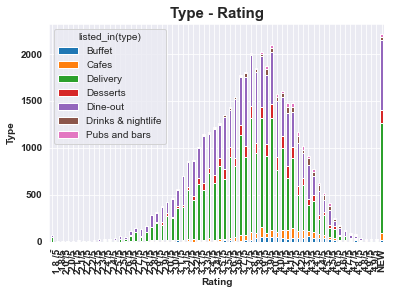

In [17]:
type_plt=pd.crosstab(df['rate'],df['listed_in(type)'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

C:\Users\rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'No. of restaurants')

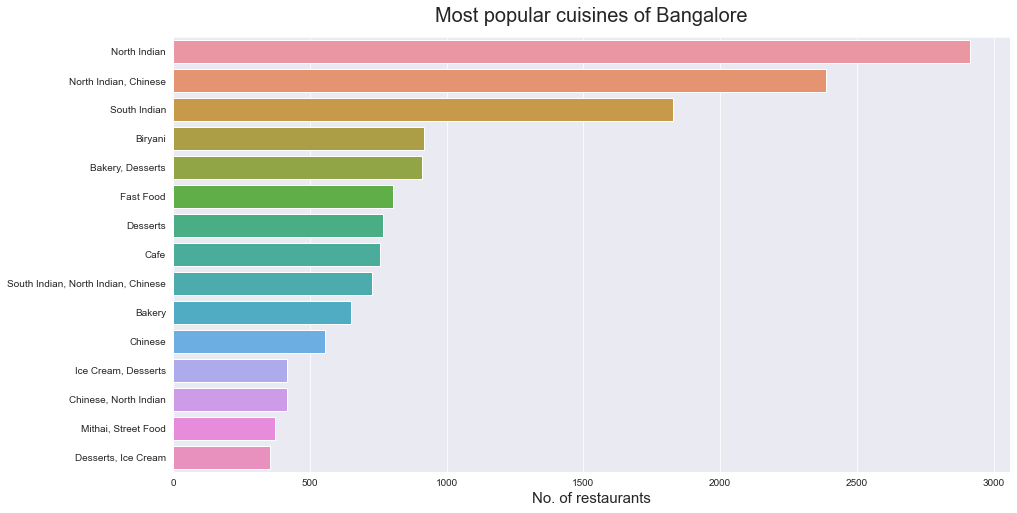

In [18]:
plt.figure(figsize=(15,8))
cuisines=df['cuisines'].value_counts()[:15]
sns.barplot(cuisines,cuisines.index)
plt.title('Most popular cuisines of Bangalore', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)

In [21]:
# fig, ax = plt.subplots(figsize=[15,7])
# sns.distplot(df['approx_cost(for two people)'],color="magenta")
# ax.set_title('Approx cost for two people distribution',size=20,pad=15)
# plt.xlabel('Approx cost for two people',size = 15)
# plt.ylabel('Percentage of restaurants',size = 15)

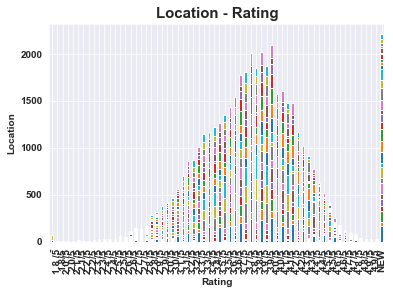

In [31]:
loc_plt=pd.crosstab(df['rate'],df['listed_in(city)'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend().remove()

In [27]:
# plt.figure(figsize=(6,6))
# sns.distplot(df['approx_cost(for two people)'])
# plt.show()